# 2. Implement EM Algorithm

In [1]:
import random
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

from scipy.stats import multivariate_normal as mvn

import re

## a.

(272, 2)


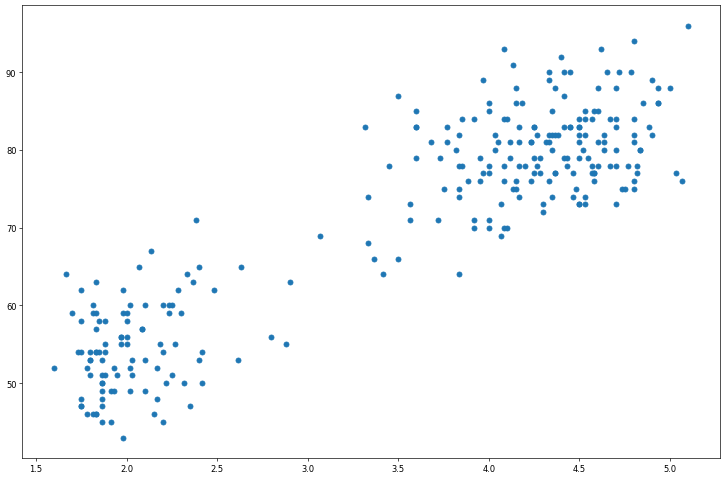

In [10]:
faithful_train = []
for line in open('faithful.csv'):
    stripped = re.split("\s+", line.strip())
    if stripped[1] == 'eruptions':
        continue
    faithful_train.append([float(stripped[1]), float(stripped[2])])

faithful_train = np.array(faithful_train)
X = faithful_train
plt.figure(figsize=(15, 10), dpi=60)
plt.scatter(faithful_train[:, 0], faithful_train[:, 1])

## d.

### i.

In [3]:
K = 2
d = X.shape[1]

In [4]:
def e_step(X, mu, sigma, phi):
    e = np.zeros((X.shape[0], K))
    for i in range(K):
        e[:, i] = mvn.pdf(X, mu[i], sigma[i]) * phi[i]
    
    return e / np.sum(e, axis=1, keepdims=True)  

In [5]:
def m_step(X, e):
    sigma = np.zeros((K, d, d))

    phi = []
    mu = []
    for k in range(K):
        mu_k = np.zeros(d)
        sigma_k = np.zeros((d, d))
        n_k = np.sum(e[:, k])
    
        phi_k = n_k / np.sum(e)
        phi.append(phi_k)
        
        for i in range(X.shape[0]):
            x_i = X[i, :]
            p = e[i, k]
            mu_k += (p * x_i) 
        mu.append(mu_k / n_k)
        
        for i in range(X.shape[0]):
            x_i = X[i, :]
            p = e[i, k]
            sigma_k += np.diag(p * ((x_i - mu[k]) * (x_i - mu[k]).T))
        sigma[k, :, :] = sigma_k / n_k
        
    return np.array(mu), sigma, np.array(phi)

In [6]:
# initialize theta
mu = []
sigma = np.zeros((K, d, d))
phi = []
for i in range(K):   
    
    # generate starting mu by selecting random samples
    random_index = random.choice(range(0, X.shape[0]))
    mu_k = X[random_index]
    mu.append(mu_k)

    # generate one sigma using the variance of X
    for j in range(d):
        sigma[i][j][j] = np.var(X[:, j])
       
    # assume each cluster has equal probability
    phi.append(1/K)

### ii.
Since we are maximizing the log likelihood as our objective (given in part c), we terminate the algorithm when our objective changes by a small enough amount (.0001) which indicates that we have reached a local maximum.  After testing with a few different values, we decided .0001 because it allows the algorithm enough iterations to find the best cluster means.

### iii.

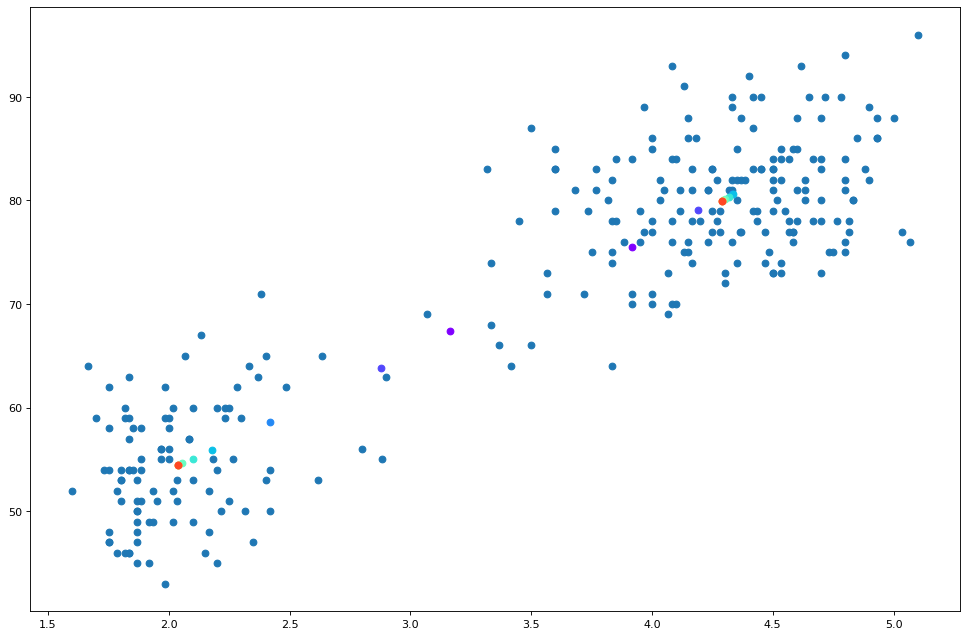

In [7]:
# set up plot
plt.figure(figsize=(15, 10), dpi=80)
plt.scatter(faithful_train[:, 0], faithful_train[:, 1])
num_iter = 12
color = iter(cm.rainbow(np.linspace(0, 1, num_iter)))

objective = .0002    
current_objective = 0
while (abs(objective - current_objective) > .0001):
    e = e_step(X, mu, sigma, phi)
    mu, sigma, phi = m_step(X, e)
    
    current_objective = objective
    
    objective = 0
    for i in range(K):
        objective += np.sum(e[:, i] * (np.log(mvn.pdf(X, mu[i], sigma[i])) + np.log(phi[i])))
        
    c = next(color)
    plt.scatter(mu[:, 0], mu[:, 1], color=c)

## e.

No, I do not think I would get different clusters.  I tested it below and the clusters are the same as in the EM implementation.  This is because both algorithms work to find the most likely means of 2 different clusters: KMeans uses distance to assign each point to a cluster and readjust the mean iteratively based on the points assigned to a cluster whereas EM uses weights from probabilities to update the means for the clusters.

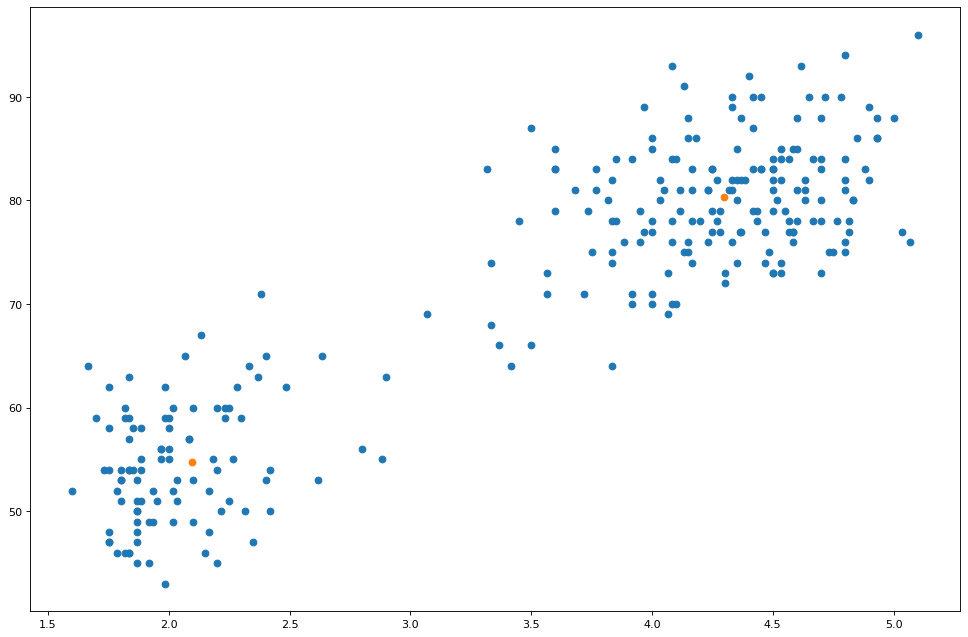

In [8]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(15, 10), dpi=80)
plt.scatter(faithful_train[:, 0], faithful_train[:, 1])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1])